#Clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

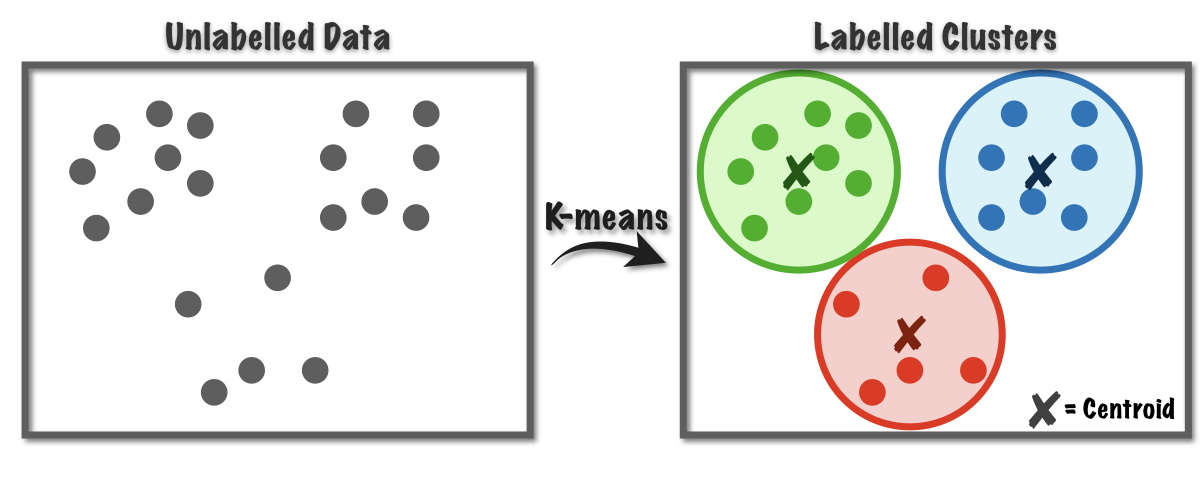

* Recommender systems (grouping together users with similar viewing patterns on Netflix, in order to recommend similar content)
* Anomaly detection (fraud detection, detecting defective mechanical parts)
* Genetics (clustering DNA patterns to analyze evolutionary biology)
* Customer segmentation (understanding different customer segments to devise marketing strategies)



-------
We will use **Scikit-learn** library implementation of clustering algorithms together with **Matplotlib** library for visualization.

##[Scikit-learn](https://scikit-learn.org/)

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

##[Matplotlib](https://matplotlib.org/)

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

------

Import Scikit-learn, Matplotlib, and NumPy.

In [1]:
import sklearn
from sklearn import datasets, cluster

import matplotlib.pyplot as plt
import numpy as np

#Toy datasets. 
First we generate some toy datasets. We choose the number of samples (points) for each dataset, the size should be big enough to see the scalability
of the algorithms, but not too big to avoid too long running times.

In [2]:
n_samples = 500

Set random seed, so multiple runs return random but same results. If random_state is not set, Scikit-Learn will use NumPy.

In [3]:
np.random.seed(0)

Initialize list of colors, so we can easily choose colors in subsequent snipsets. You can choose other colors: https://g.co/kgs/xfTRvZ or you can use predefined names:

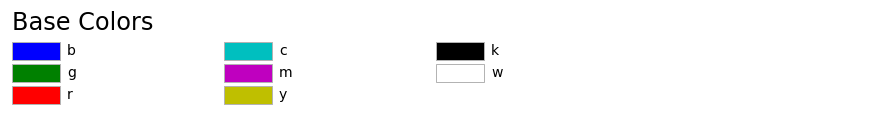

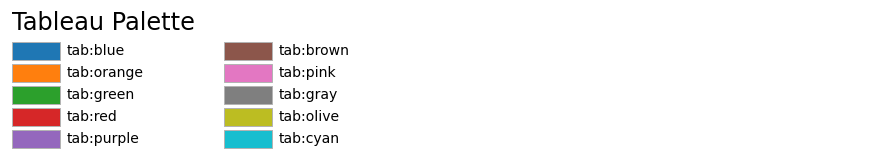

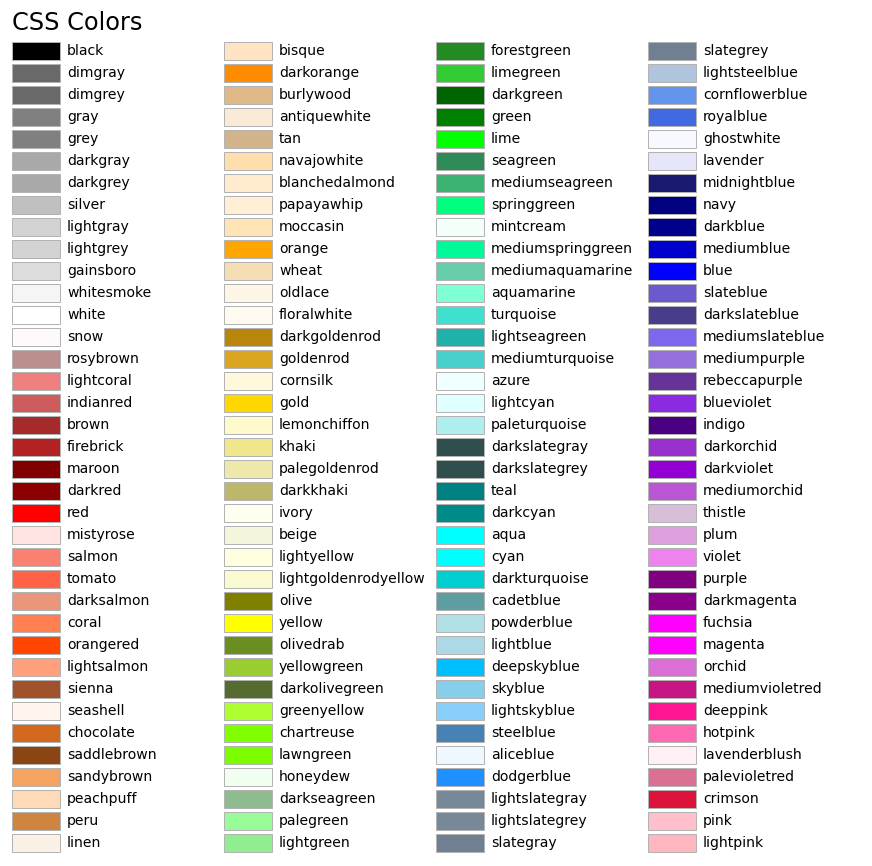

In [4]:
colors = np.array(["#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
                   "#a65628", "#984ea3", "#999999", "#e41a1c",
                   "#dede00"] * 5000)

We subsequently generate 6 toy datasets: noisy_circles, noisy_moons, gaussian_blobs, gaussian_blobs_with_varied_std, gaussian_blobs_sheared_and_rotated, random_noise 

##[sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)

Scikit-learn makes a large circle containing a smaller circle in 2d.

**noise : float, default=None**
> Standard deviation of Gaussian noise added to the data.

**factor : float, default=.8**
> Scale factor between inner and outer circle in the range (0, 1).




In [5]:
noisy_circles, _ = sklearn.datasets.make_circles(n_samples=n_samples, 
                                                 noise=0.05,
                                                 factor=0.5)
print("First ten data points:\n", noisy_circles[:10])

First ten data points:
 [[-0.66723969  0.76788488]
 [ 0.40066152  0.05961979]
 [ 0.36386096  0.37317766]
 [ 0.07814635 -0.48627362]
 [ 0.29839013 -0.55392759]
 [ 1.0275721   0.38762922]
 [-0.07654603  0.47851914]
 [ 0.50570092 -0.14228116]
 [-0.75811998 -0.65102674]
 [-0.76796954 -0.59604733]]


Matplotlib plots the data points.

##[matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

**x, y : float or array-like, shape (n, )**
>The data positions.

**s : float or array-like, shape (n, )**
>The marker size.

**c : array-like or list**
>Colors or color of data.

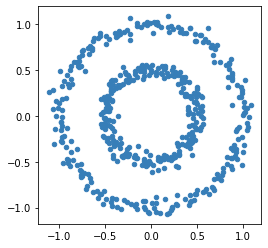

In [6]:
_ = plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], s=20, color=colors[0])
_ = plt.axis('scaled')

##[sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

Scikit-learn makes two interleaving half circles.

**noise : float, default=None**
> Standard deviation of Gaussian noise added to the data.

[[ 0.66969414 -0.43432558]
 [ 1.40750277 -0.46453048]
 [ 0.84853362  0.41611224]
 [ 0.45075146  0.80270383]
 [ 1.97000062  0.16778807]
 [-0.55089867  0.89511922]
 [ 0.79576344  0.57765508]
 [-0.0076784   0.32981317]
 [-0.39290077  1.00235501]
 [ 1.56593686 -0.371196  ]]



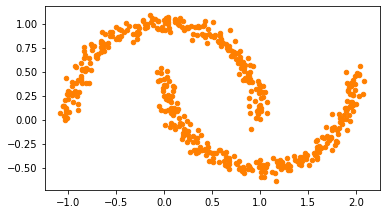

In [7]:
noisy_moons, _ = sklearn.datasets.make_moons(n_samples=n_samples, 
                                  noise=0.05)
print(noisy_moons[:10])
print()

_ = plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], s=20, color=colors[1])
_ = plt.axis('scaled')

##[sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

Scikit-Learn generates Gaussian blobs.

**centers : int or ndarray of shape (n_centers, n_features), default=None**
> The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated.

**cluster_std : float or array-like of float, default=1.0**
> The standard deviation of the clusters.



[[-6.46762491e+00 -1.00305138e+01]
 [ 7.49985237e+00  9.55274284e+00]
 [ 8.00599510e+00  9.53388389e+00]
 [ 7.33428129e+00 -1.64087951e-01]
 [ 8.39164302e+00  1.90776923e+00]
 [ 6.35283399e+00  2.52482284e+00]
 [ 8.82217399e+00  1.07623216e+01]
 [ 8.74583517e+00  1.94192130e-03]
 [ 7.49341310e+00  1.10089236e+01]
 [ 5.82259795e+00  8.88727231e+00]]



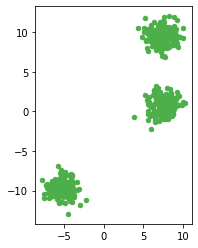

In [8]:
gaussian_blobs, _ = sklearn.datasets.make_blobs(n_samples=n_samples, 
                                                random_state=8)

print(gaussian_blobs[:10])
print()

_ = plt.scatter(gaussian_blobs[:, 0], gaussian_blobs[:, 1], s=20, color=colors[2])
_ = plt.axis('scaled')


Scikit-Learn generates Gaussian blobs of different standard deviation.

[[ 2.31250737  0.10450525]
 [ 1.28768308  0.28029139]
 [-5.12460358  0.48717445]
 [ 2.57830781 -0.31760562]
 [-9.95877648 -6.64905881]
 [-5.59211084 -1.01509233]
 [ 2.31231339  0.29274703]
 [-2.67231017 -6.38078158]
 [-7.55683362 -5.32341638]
 [-8.52689514 -3.7610477 ]]



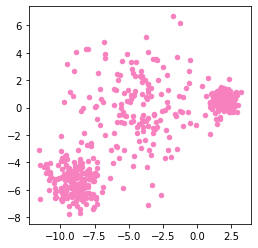

In [9]:
gaussian_blobs_with_varied_std, _ = sklearn.datasets.make_blobs(n_samples=n_samples, 
                                                                cluster_std=[1.0, 2.5, 0.5], 
                                                                random_state=170)

print(gaussian_blobs_with_varied_std[:10])
print()

_ = plt.scatter(gaussian_blobs_with_varied_std[:, 0], 
                gaussian_blobs_with_varied_std[:, 1], s=20, color=colors[3])
_ = plt.axis('scaled')

We shear and rotate Gaussian blobs generated with Scikit-Learn.

[[ 1.7302065  -1.84865675]
 [ 0.35978844 -0.33760978]
 [-2.98133596  3.0805867 ]
 [ 2.38685572 -2.84299467]
 [-3.31564236  0.65601884]
 [-2.85317502  2.71206307]
 [ 1.5793803  -1.54723713]
 [-1.29391258  0.29429035]
 [-2.40473362  0.27536706]
 [-3.611718    2.10729892]]



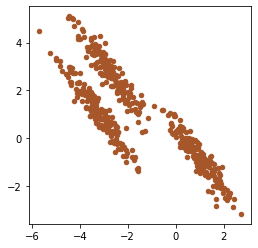

In [10]:
X_tmp, _ = sklearn.datasets.make_blobs(n_samples=n_samples, 
                                       random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
gaussian_blobs_sheared_and_rotated = np.dot(X_tmp, transformation)

print(gaussian_blobs_sheared_and_rotated[:10])
print()

_ = plt.scatter(gaussian_blobs_sheared_and_rotated[:, 0], 
                gaussian_blobs_sheared_and_rotated[:, 1], s=20, color=colors[4])
_ = plt.axis('scaled')

##[numpy.random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)

Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

[[0.45375506 0.91896671]
 [0.45260478 0.46110313]
 [0.16269627 0.66490523]
 [0.16851253 0.30963756]
 [0.69919121 0.30605792]
 [0.60282154 0.9767111 ]
 [0.04311825 0.39420789]
 [0.89973486 0.58986812]
 [0.9417751  0.95046502]
 [0.82742825 0.34791934]]



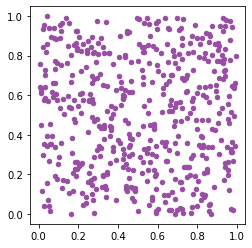

In [11]:
random_noise = np.random.rand(n_samples, 2)

print(random_noise[:10])
print()

_ = plt.scatter(random_noise[:, 0], random_noise[:, 1], s=20, color=colors[5])
_ = plt.axis('scaled')

Now, we group all the 6 datasets into one list, so we can effeciently iterate over them.

In [12]:
datasets = [noisy_circles, 
            noisy_moons, 
            gaussian_blobs, 
            gaussian_blobs_with_varied_std, 
            gaussian_blobs_sheared_and_rotated,
            random_noise]

**run_clustering_algorithm_on_datasets**(algorithm, datasets) runs **algorithm** (Scikit-learn) on all **datasets** and plots (Matplotlib) the result.

In [13]:
import time
def run_clustering_algorithm_on_datasets(algorithm, datasets):
    #set up size of the output figure
    plt.figure(figsize=(6 * 4, 4))
    #set up borders/padding of subplots
    plt.subplots_adjust(left=0.02, 
                        right=0.98, 
                        bottom=0.001, 
                        top=0.999, 
                        wspace=0.05, 
                        hspace=0.01)
    plot_num = 1
    for dataset in datasets:
      #normalize data
      dataset = sklearn.preprocessing.StandardScaler().fit_transform(dataset)

      #run algorithm and measure the running time
      t0 = time.time()
      algorithm.fit(dataset)
      t1 = time.time()

      #output labels (membership of each data point is stored in algorithm.labels_)
      if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
      else:
        y_pred = algorithm.predict(dataset)
    
      #ensure that outliers are ploted in black color (outliers have label -1)
      tmp_colors = np.copy(colors)
      tmp_colors[max(y_pred) + 1] = "#000000"
      y_pred[y_pred == -1] = max(y_pred) + 1

      #choose the right subplot
      plt.subplot(1, len(datasets), plot_num)
      #plot into the subplot
      plt.scatter(dataset[:, 0], dataset[:, 1], s=20, color=tmp_colors[y_pred])

      #set limits to axis
      plt.xlim(-2.5, 2.5)
      plt.ylim(-2.5, 2.5)
      #remove ticks
      plt.xticks(())
      plt.yticks(())
      #plot running time into right bottom corner of subplot
      plt.text(0.99,
               0.01,
               ("%.2fs" % (t1 - t0)).lstrip("0"),
               transform=plt.gca().transAxes,
               size=15,
               horizontalalignment="right")
      plot_num += 1

#K-Means
##[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

**Parameters**
> number of clusters

**Scalability**
> Very large n_samples, medium n_clusters with
MiniBatch code

**Usecase**
> General-purpose, even cluster size, flat geometry,
not too many clusters, inductive

**Geometry (metric used)**
> Distances between points

<br>

-----

<br>

**n_clusters : int, default=8**
>The number of clusters to form as well as the number of centroids to generate.

**init : {‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’**
>Method for initialization:
>>**‘k-means++’** : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
<br>
**‘random’** : choose n_clusters observations (rows) at random from data for the initial centroids.

**n_init : int, default=10**
>Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

**max_iter : int, default=300**
>Maximum number of iterations of the k-means algorithm for a single run.

**tol : float, default=1e-4**
>Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.

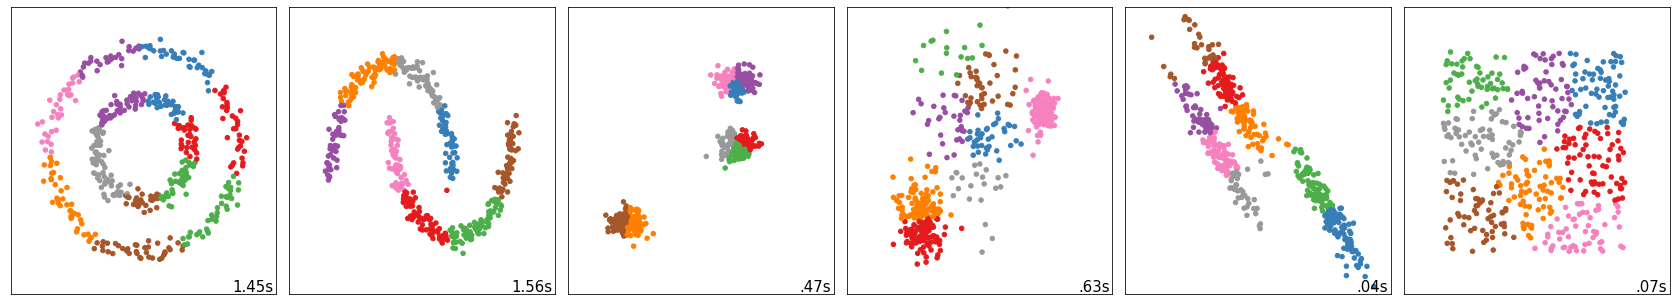

In [15]:
o = sklearn.cluster.KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10)
run_clustering_algorithm_on_datasets(o, datasets)

#Hierarchical Clustering
##[sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Parameters**
> number of clusters or distance threshold, linkage type, distance

**Scalability**
> Large n_samples and n_clusters

**Usecase**
> Many clusters, possibly connectivity constraints, non Euclidean
distances, transductive

**Geometry (metric used)**
> Any pairwise distance

The AgglomerativeClustering object performs a **hierarchical clustering** using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

* **Ward** minimizes the sum of squared differences within all clusters. It is a 
variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

* **Maximum** or **complete linkage** minimizes the maximum distance between observations of pairs of clusters.

* **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

* **Single linkage** minimizes the distance between the closest observations of pairs of clusters.
<br>


---

<br>

**n_clusters : int or None, default=2**
>The number of clusters to find.

**linkage : {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’**
>Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

**distance_threshold : float, default=None**
>The linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.



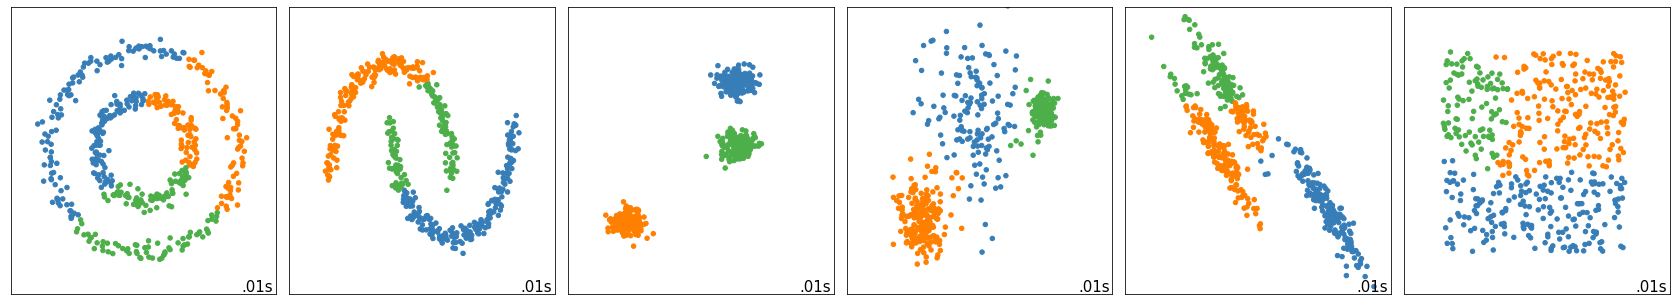

In [16]:
run_clustering_algorithm_on_datasets(sklearn.cluster.AgglomerativeClustering(n_clusters=3, linkage="ward"), datasets)

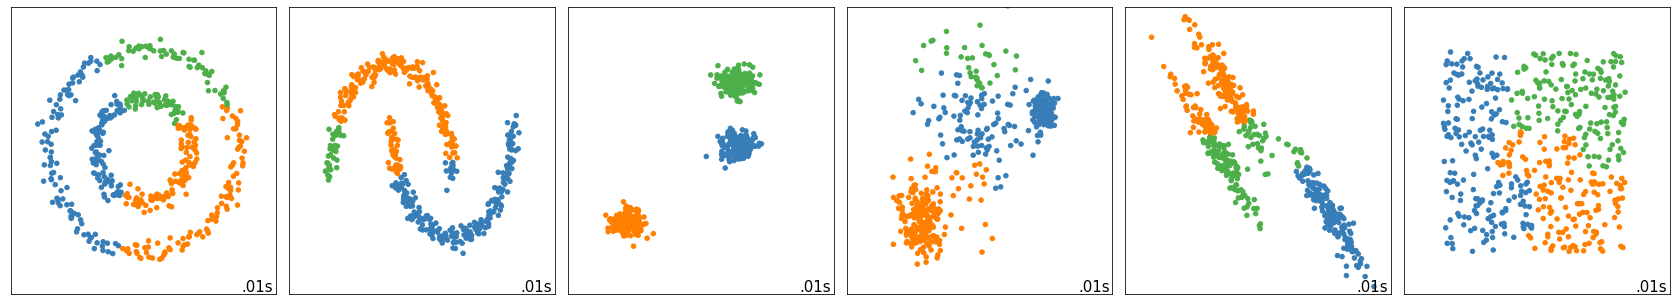

In [17]:
run_clustering_algorithm_on_datasets(sklearn.cluster.AgglomerativeClustering(n_clusters=3, linkage="complete"), datasets)

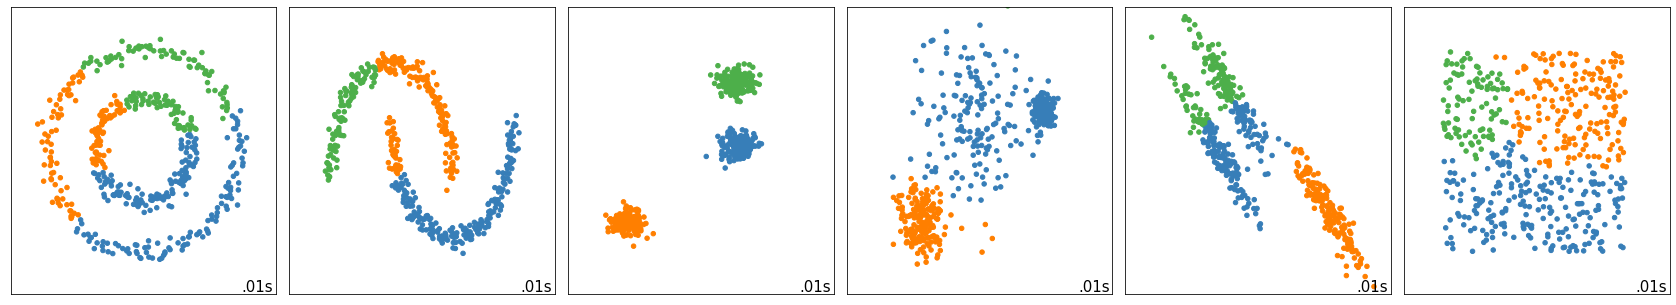

In [18]:
run_clustering_algorithm_on_datasets(sklearn.cluster.AgglomerativeClustering(n_clusters=3, linkage="average"), datasets)

In [ ]:
run_clustering_algorithm_on_datasets(sklearn.cluster.AgglomerativeClustering(n_clusters=3, linkage="single"), datasets)

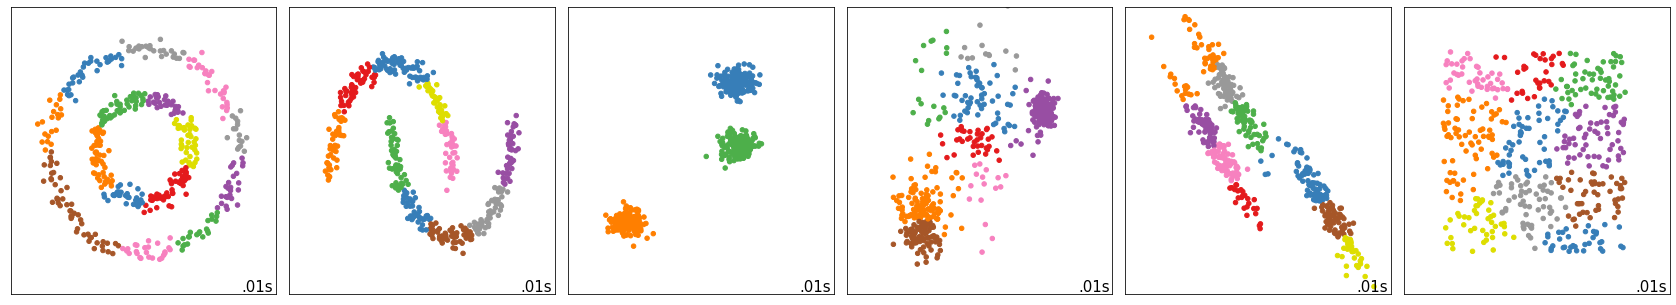

In [19]:
run_clustering_algorithm_on_datasets(sklearn.cluster.AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=4), datasets)

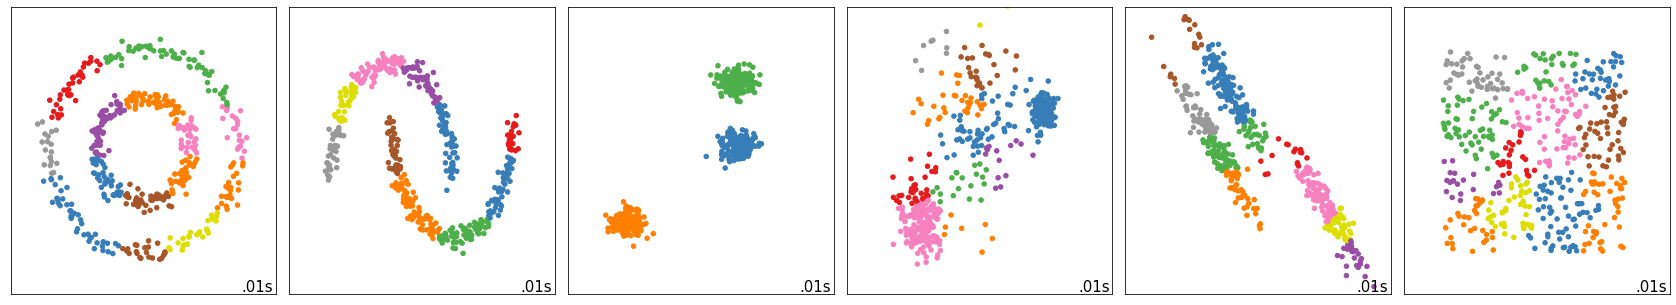

In [20]:
run_clustering_algorithm_on_datasets(sklearn.cluster.AgglomerativeClustering(n_clusters=None, linkage="complete", distance_threshold=1.5), datasets)

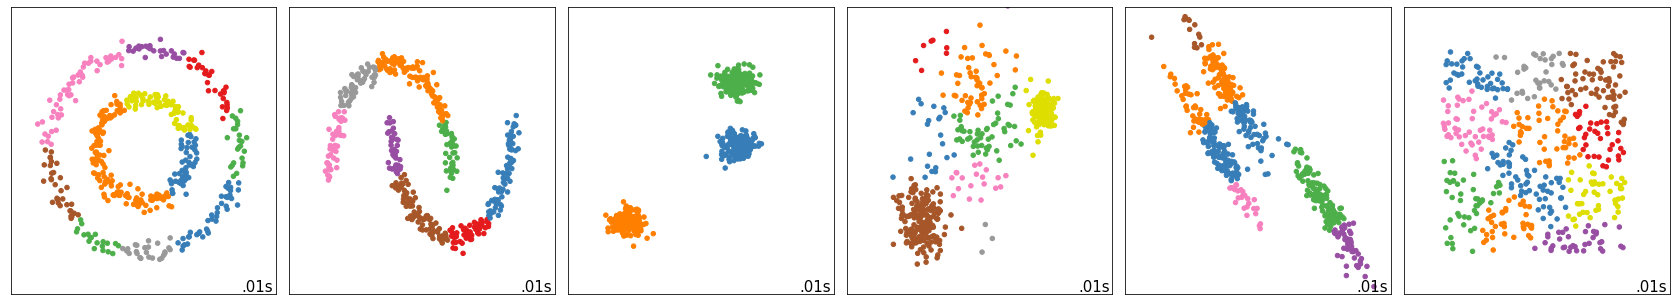

In [21]:
run_clustering_algorithm_on_datasets(sklearn.cluster.AgglomerativeClustering(n_clusters=None, linkage="average", distance_threshold=0.95), datasets)

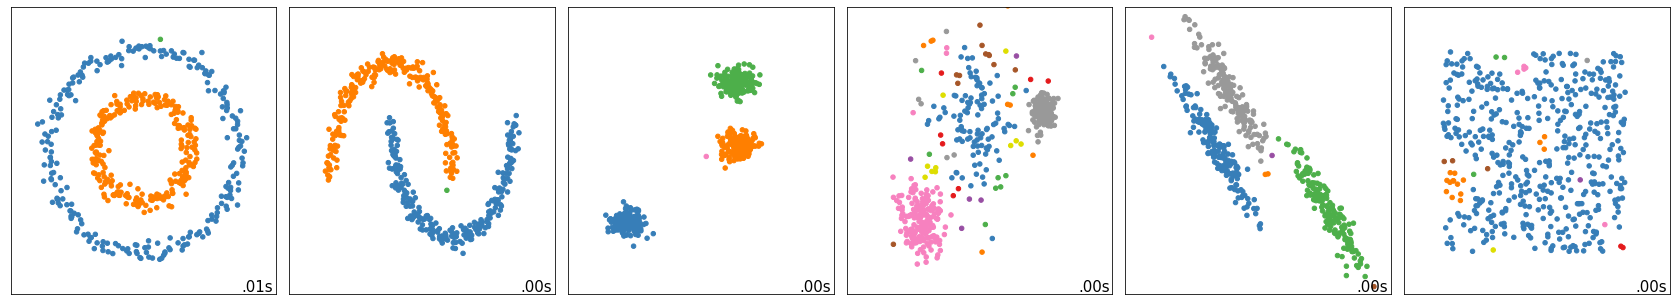

In [22]:
run_clustering_algorithm_on_datasets(sklearn.cluster.AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=0.2), datasets)

#DBSCAN
##[sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

**Parameters**
>neighborhood size

**Scalability**
>Very large n_samples, medium n_clusters

**Usecase**
>Non-flat geometry, uneven cluster sizes, outlier removal,
transductive

**Geometry (metric used)**
>Distances between nearest points

<br>

------

<br>


**eps : float, default=0.5**
>The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

**min_samples : int, default=5**
>The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

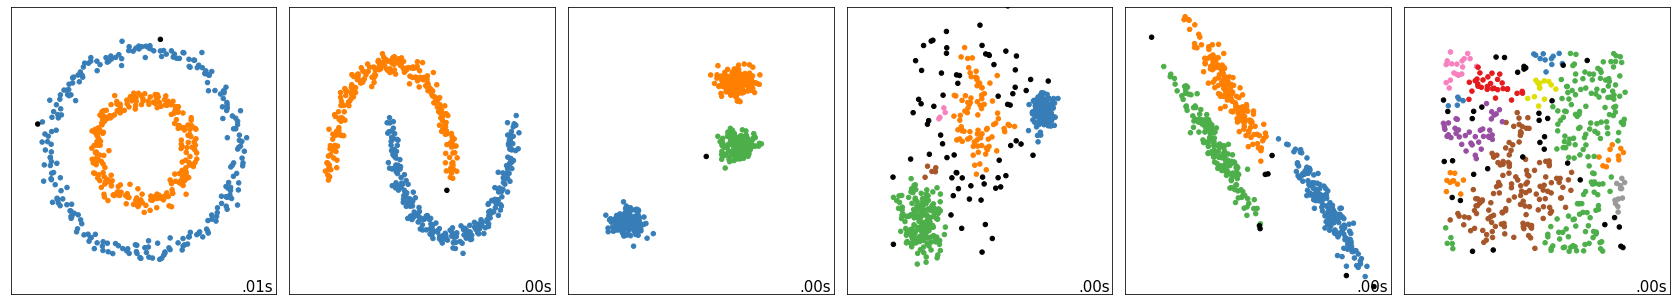

In [23]:
run_clustering_algorithm_on_datasets(sklearn.cluster.DBSCAN(eps=0.2, min_samples=5), datasets)

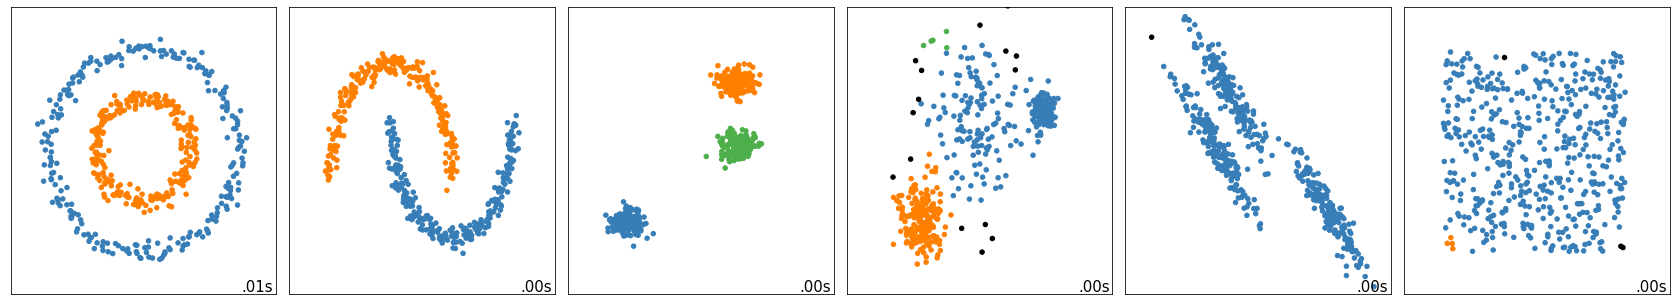

In [24]:
run_clustering_algorithm_on_datasets(sklearn.cluster.DBSCAN(eps=0.3, min_samples=5), datasets)

#Clustering Task

Create a **new dataset** with the help of functions from Toy dataset section (sklearn.datasets.make_circles, sklearn.datasets.make_moons, sklearn.datasets.make_blobs, numpy.random.rand).

It might look something like this:

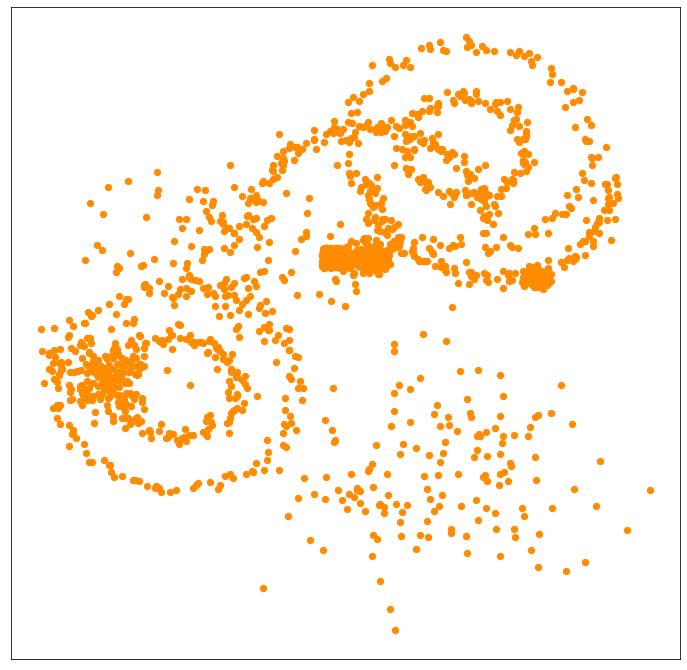

In the following template, replace **...** with appropriate code, use Toy Dataset section for inspiration.

In [ ]:
X_0, _ = sklearn.datasets.make_moons(...)

X_1, _ = sklearn.datasets.make_circles(...)

X_2, _ = sklearn.datasets.make_blobs(...)

X_3, _ = sklearn.datasets.make_circles(...)

X_4 = np.random.rand(...)

# ...

X_n = ...

# you can additionaly multiply and shift any X_n, to make the result more interesting 
X = np.concatenate((X_0 * 5 + 2, X_1 * 5 - 6, X_2, X_3 * 5 + 6, X_4, ..., X_n))


plt.figure(figsize=(12, 12))
    
_ = plt.scatter(...)
_ = plt.xticks(())
_ = plt.yticks(())

Choose any clustering algorithm provided by Scikit-learn library to cluster your dataset. Use **run_clustering_algorithm_on_datasets**(algorithm, datasets) function for inspiration.

Output of KMeans on the previous example dataset might look something like this:
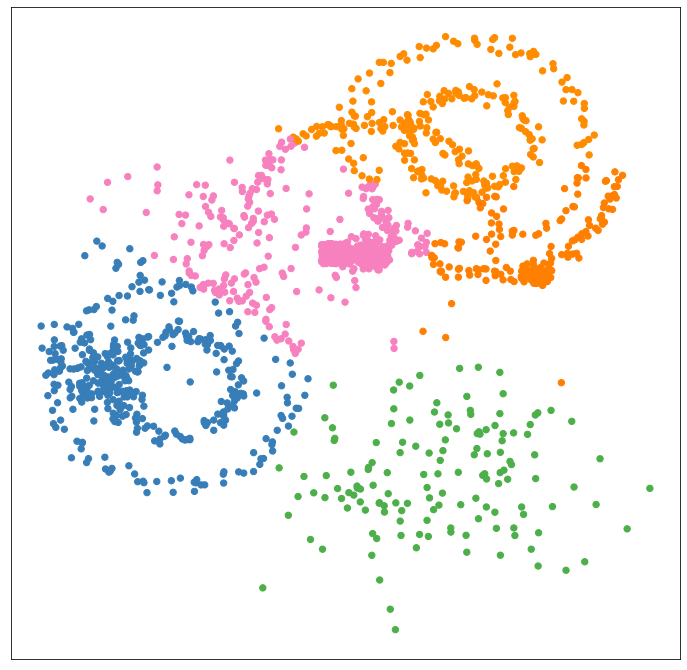

In [ ]:
algorithm = sklearn.cluster....

X = sklearn.preprocessing.StandardScaler().fit_transform(X)

# run the algorithm
algorithm....

# get results
y_pred = algorithm....

plt.figure(figsize=(12, 12))

# plot result
_ = plt.scatter(...)
_ = plt.xticks(())
_ = plt.yticks(())